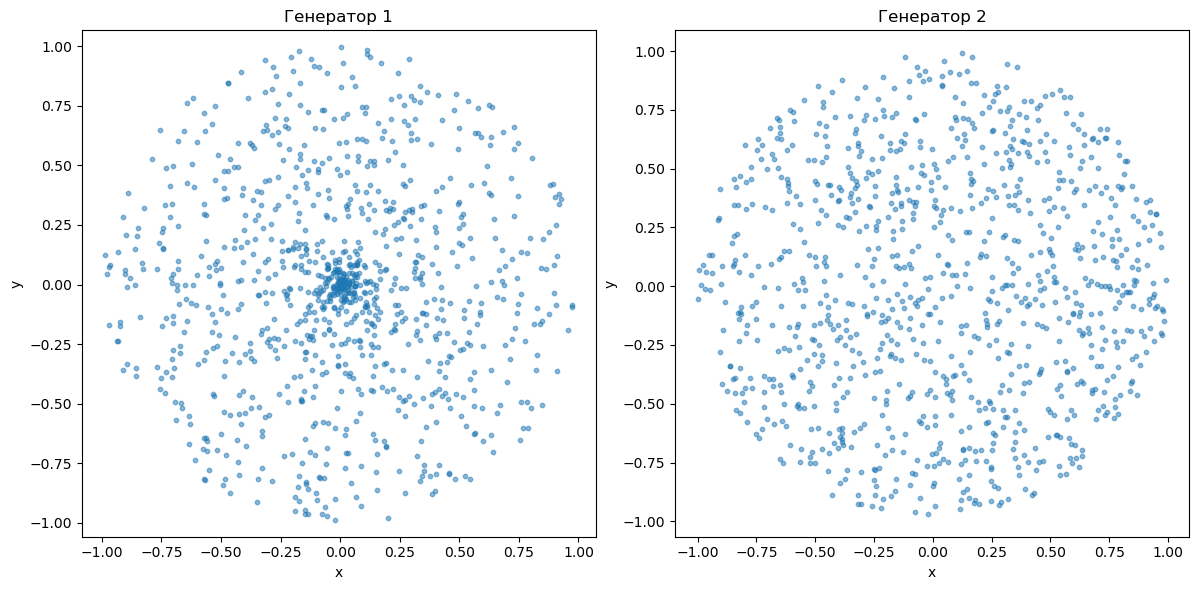

In [15]:
import numpy as np
import matplotlib.pyplot as plt


num_points = 1000
def generate1(num_points):
    points = []
    for _ in range(num_points):
        a = np.random.uniform(0, 1)
        b = np.random.uniform(0, 1)
        x = a * np.cos(2 * np.pi * b)
        y = a * np.sin(2 * np.pi * b)
        points.append((x, y))
    return np.array(points)


def generate2(num_points):
    points = []
    while len(points) < num_points:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x ** 2 + y ** 2 <= 1:
            points.append((x, y))
    return np.array(points)


points_gen1 = generate1(num_points)
points_gen2 = generate2(num_points)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(points_gen1[:, 0], points_gen1[:, 1], s=10, alpha=0.5)
plt.title("Генератор 1")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

plt.subplot(1, 2, 2)
plt.scatter(points_gen2[:, 0], points_gen2[:, 1], s=10, alpha=0.5)
plt.title("Генератор 2")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")

plt.tight_layout()
plt.show()

In [19]:
import sys
import numpy as np


def classify_set(points):
    points = np.array(points).reshape(-1, 2)
    radius = np.sqrt(points[:, 0] ** 2 + points[:, 1] ** 2)
    mean_radius = np.mean(radius)
    std_radius = np.std(radius)
    if mean_radius < 0.6 and std_radius < 0.3:
        return 1
    else:
        return 2


def main():
    data = [list(map(float, input().split())) for _ in range(100)]
    [print(classify_set(points)) for points in data]
    

if __name__ == '__main__':
    main()

In [21]:
from sklearn.metrics import accuracy_score


def generate_random_sets(num_sets, num_points):
    data = []
    labels = []
    for _ in range(num_sets):
        generator = np.random.choice([1, 2])
        if generator == 1:
            points = generate1(num_points)
        else:
            points = generate2(num_points)
        data.append(points)
        labels.append(generator)
    return data, labels


num_sets = 100
data, true_labels = generate_random_sets(num_sets, num_points)
predicted_labels = [classify_set(points) for points in data]
accuracy = accuracy_score(true_labels, predicted_labels)
accuracy, predicted_labels[:10], true_labels[:10]

(1.0, [2, 2, 2, 1, 2, 1, 1, 1, 2, 2], [2, 2, 2, 1, 2, 1, 1, 1, 2, 2])